## Análisis exploratorio de los datos disponibles sobre *AirBnb*

En la [web](http://insideairbnb.com/get-the-data.html) tenemos 7 archivos diferentes sobre los establecimientos AirBnb en Madrid.  Estos archivos son:
* listings.csv.gz 
* calendar.csv.gz 
* reviews.csv.gz
* listings.csv
* reviews.csv
* neighbourhoods.csv
* neighbourhoods.geojson

Los que tienen la extensión .gz son datos sin agrupar que vienen en formato comprimido mientras que los que no la tienen son datos agregados.  Los dos últimos tienen la función de geolocalizar los apartamentos en el mapa.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df0 = pd.read_csv('Data/Madrid/listings0.csv.gz',compression='gzip',low_memory=False)
df1 = pd.read_csv('Data/Madrid/listings1.csv.gz',compression='gzip',low_memory=False) 
df2 = pd.read_csv('Data/Madrid/listings2.csv.gz',compression='gzip',low_memory=False)
df3 = pd.read_csv('Data/Madrid/listings3.csv.gz',compression='gzip',low_memory=False)
df4 = pd.read_csv('Data/Madrid/listings4.csv.gz',compression='gzip',low_memory=False)
df5 = pd.read_csv('Data/Madrid/listings5.csv.gz',compression='gzip',low_memory=False)
df6 = pd.read_csv('Data/Madrid/listings6.csv.gz',compression='gzip',low_memory=False)
df7 = pd.read_csv('Data/Madrid/listings7.csv.gz',compression='gzip',low_memory=False)
df8 = pd.read_csv('Data/Madrid/listings8.csv.gz',compression='gzip',low_memory=False)
df9 = pd.read_csv('Data/Madrid/listings9.csv.gz',compression='gzip',low_memory=False)
df10 = pd.read_csv('Data/Madrid/listings10.csv.gz',compression='gzip',low_memory=False)
listings = [df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]

In [3]:
df = pd.concat(listings)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [4]:
#vemos la estructura de los datos 
df.shape

(193018, 106)

In [5]:
#Todas las columnas están en minúsculas y no hay espacios
df.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode
0,"Full use of living room, kitchen (with dishwas...",2,"{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",30,83,53,83,1.0,Real Bed,1.0,...,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,172.0,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain","Atico en la calle Principe de Vergara, con bañ...",NaN,Excelent public transport and easy Access to m...,$350.00,NaN,28016
1,There is fibre optic internet connection for y...,1,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",0,0,0,0,1.0,Real Bed,1.0,...,I am living in a nice flat near the centre of ...,97.0,Madrid,"Madrid, Madrid, Spain",We have a quiet and sunny room with a good vie...,NaN,The flat is near the centre of Madrid (15 minu...,$98.00,NaN,28047
2,La disponibilidad de acceso al apartamento es ...,4,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",18,317,35,56,1.0,Real Bed,2.0,...,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",Apartamento céntrico junto a Gran Vía (VT-296)...,NaN,La situación del apartamento hace accesibles a...,$600.00,NaN,28004
3,NaN,2,"{Internet,Wifi,""Wheelchair accessible"",Doorman...",29,364,59,89,1.0,Real Bed,1.0,...,Room for two person with dressing room and bat...,NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",NaN,NaN,NaN,NaN,NaN,28045
4,– Smoking is prohibited in rooms and public ar...,1,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",2,329,31,61,1.0,Real Bed,1.0,...,Nice and cozy roon for one person with a priva...,NaN,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",Nice and cozy roon for one person with a priva...,NaN,Muy bien comunicado con dos Metros a cinco min...,NaN,NaN,28045


In [6]:
df.scrape_id.value_counts()

20180814184154    18672
20180710171328    18362
20180911024451    18045
20181210203343    17834
20190114203145    17491
20190206175658    17358
20180514032209    17331
20181010054647    17303
20181107122227    17301
20180412035726    17008
20180116205114    16313
Name: scrape_id, dtype: int64

In [7]:
#Pasamos a formato fecha la fecha en la que se hace scraping, ya que nos será útil luego
df['scrape_id'] = df.scrape_id.astype("object")
df['scrape_id'] = pd.to_datetime(df['scrape_id'],format="%Y%m%d%H%M%S")
#Comprobamos que el resultado está bien
df.scrape_id[0:4]

0   2019-02-06 17:56:58
1   2019-02-06 17:56:58
2   2019-02-06 17:56:58
3   2019-02-06 17:56:58
Name: scrape_id, dtype: datetime64[ns]

In [8]:
df['calendar_last_scraped'] = pd.to_datetime(df['calendar_last_scraped'])

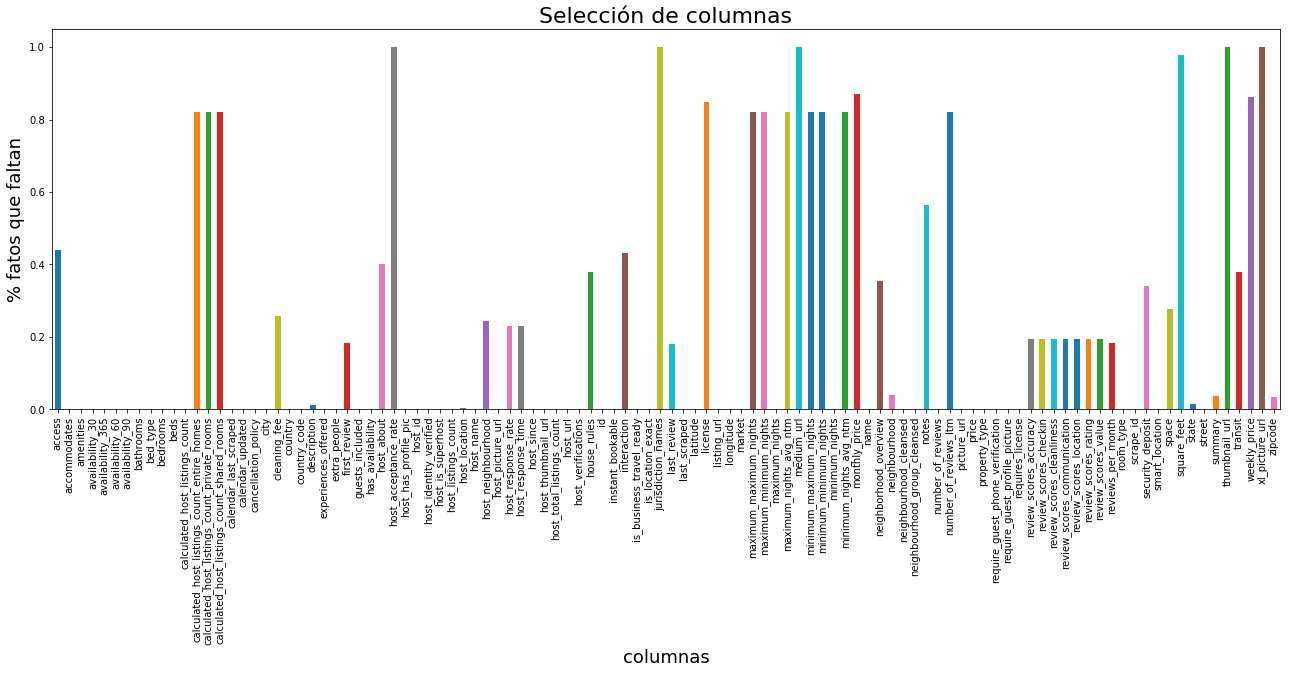

In [9]:
#El siguiente paso es realizar una selección de las columnas que aportan valor al análisis, 

missing = df.isnull().sum()/df.shape[0]
ax = missing.plot(kind='bar',figsize=(22,7))
ax.set_xlabel('columnas',fontsize=18)
ax.set_ylabel('% fatos que faltan',fontsize=18)
ax.set_title('Selección de columnas',fontsize=22)
plt.show()


In [26]:
#El primer criterio elegido para reducir el número de columnas es que contenga muchos nulos
missing[missing > 0.3]



access                                          0.439358
calculated_host_listings_count_entire_homes     0.819452
calculated_host_listings_count_private_rooms    0.819452
calculated_host_listings_count_shared_rooms     0.819452
host_about                                      0.401362
host_acceptance_rate                            1.000000
house_rules                                     0.378633
interaction                                     0.430494
jurisdiction_names                              1.000000
license                                         0.847797
maximum_maximum_nights                          0.819452
maximum_minimum_nights                          0.819452
maximum_nights_avg_ntm                          0.819452
medium_url                                      1.000000
minimum_maximum_nights                          0.819452
minimum_minimum_nights                          0.819452
minimum_nights_avg_ntm                          0.819452
monthly_price                  

In [11]:
a_borrar = ['calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
           'calculated_host_listings_count_shared_rooms','host_acceptance_rate','jurisdiction_names',
           'license','maximum_maximum_nights','maximum_minimum_nights','maximum_nights_avg_ntm',
           'medium_url','minimum_maximum_nights','minimum_minimum_nights','minimum_nights_avg_ntm', 
           'monthly_price','notes','number_of_reviews_ltm','square_feet','thumbnail_url','weekly_price'
           ,'xl_picture_url','host_about']
df.drop(a_borrar,axis=1,inplace=True)


In [12]:
#Hemos pasado de 106 columnas a 85
df.shape

(193018, 85)

In [13]:
df.columns

Index(['access', 'accommodates', 'amenities', 'availability_30',
       'availability_365', 'availability_60', 'availability_90', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'cleaning_fee', 'country', 'country_code', 'description',
       'experiences_offered', 'extra_people', 'first_review',
       'guests_included', 'has_availability', 'host_has_profile_pic',
       'host_id', 'host_identity_verified', 'host_is_superhost',
       'host_listings_count', 'host_location', 'host_name',
       'host_neighbourhood', 'host_picture_url', 'host_response_rate',
       'host_response_time', 'host_since', 'host_thumbnail_url',
       'host_total_listings_count', 'host_url', 'host_verifications',
       'house_rules', 'id', 'instant_bookable', 'interaction',
       'is_business_travel_ready', 'is_location_exact', 'last_review',
       'last_scraped', 'latitude', 'lis

In [14]:
#Comprobamos si hay valores nulos sin formatear 
df.extra_people.value_counts()

$0.00      93730
$10.00     24995
$15.00     22237
$20.00     12964
$5.00       6813
$25.00      4813
$12.00      4065
$30.00      3749
$8.00       1972
$18.00      1711
$7.00       1296
$17.00      1160
$11.00      1066
$35.00      1050
$40.00       891
$50.00       854
$6.00        841
$19.00       818
$16.00       779
$13.00       767
$9.00        721
$14.00       714
$4.00        655
$22.00       581
$28.00       375
$45.00       351
$27.00       343
$24.00       328
$29.00       316
$60.00       274
           ...  
$41.00         9
$55.00         8
$51.00         8
$88.00         8
$44.00         7
$90.00         7
$256.00        7
$52.00         6
$89.00         5
$84.00         5
$274.00        5
$260.00        4
$57.00         4
$69.00         3
$72.00         3
$58.00         3
$130.00        3
$34.00         3
$78.00         2
$59.00         2
$48.00         2
$82.00         2
$76.00         1
$104.00        1
$95.00         1
$54.00         1
$74.00         1
$81.00        

In [15]:
#Desglosamos las columnas por tipo
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193018 entries, 0 to 16312
Data columns (total 85 columns):
access                              108214 non-null object
accommodates                        193018 non-null int64
amenities                           193018 non-null object
availability_30                     193018 non-null int64
availability_365                    193018 non-null int64
availability_60                     193018 non-null int64
availability_90                     193018 non-null int64
bathrooms                           192771 non-null float64
bed_type                            193018 non-null object
bedrooms                            192967 non-null float64
beds                                192625 non-null float64
calculated_host_listings_count      193018 non-null int64
calendar_last_scraped               193018 non-null datetime64[ns]
calendar_updated                    193018 non-null object
cancellation_policy                 193018 non-null object


In [16]:
#Separamos las columnas por el tipo en el que vienen dados, valoramos su utilidad y comprobamos que sea correcto
integers = df.columns[df.dtypes == 'int64']
df[integers].tail()

,accommodates,availability_30,availability_365,availability_60,availability_90,calculated_host_listings_count,guests_included,host_id,id,maximum_nights,minimum_nights,number_of_reviews
16308,1,15,72,42,72,2,1,89980631,22765420,30,10,0
16309,3,30,365,60,90,5,1,69566471,22765827,90,3,0
16310,4,18,149,39,59,2,1,160967778,22767178,1125,4,0
16311,4,30,365,60,90,3,2,15194266,22771839,1125,2,0
16312,3,2,317,12,42,8,2,122664781,22772175,1125,1,0


In [17]:
categoricas = df.columns[df.dtypes == 'object']
df[categoricas].head()

,access,amenities,bed_type,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,description,...,requires_license,room_type,security_deposit,smart_location,space,state,street,summary,transit,zipcode
0,"Full use of living room, kitchen (with dishwas...","{Wifi,""Air conditioning"",Kitchen,Elevator,Heat...",Real Bed,5 days ago,flexible,Madrid,$5.00,Spain,ES,BETTER THAN A HOTEL.Upscale neighboorhood (Met...,...,t,Private room,$0.00,"Madrid, Spain",BETTER THAN A HOTEL.Upscale neighboorhood (Met...,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain","Atico en la calle Principe de Vergara, con bañ...",Excelent public transport and easy Access to m...,28016
1,There is fibre optic internet connection for y...,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",Real Bed,4 weeks ago,strict_14_with_grace_period,Madrid,NaN,Spain,ES,We have a quiet and sunny room with a good vie...,...,t,Private room,NaN,"Madrid, Spain",I am living in a nice flat near the centre of ...,Madrid,"Madrid, Madrid, Spain",We have a quiet and sunny room with a good vie...,The flat is near the centre of Madrid (15 minu...,28047
2,La disponibilidad de acceso al apartamento es ...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",Real Bed,2 weeks ago,moderate,Madrid,$0.00,Spain,ES,"Select the Madrid more ""cool"" : 70 m, 2 bedroo...",...,t,Entire home/apt,$200.00,"Madrid, Spain","Select the Madrid more ""cool"" : 70 m, 2 bedroo...",Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",Apartamento céntrico junto a Gran Vía (VT-296)...,La situación del apartamento hace accesibles a...,28004
3,NaN,"{Internet,Wifi,""Wheelchair accessible"",Doorman...",Real Bed,3 months ago,flexible,Madrid,$20.00,Spain,ES,Room for two person with dressing room and bat...,...,t,Private room,$150.00,"Madrid, Spain",Room for two person with dressing room and bat...,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",NaN,NaN,28045
4,– Smoking is prohibited in rooms and public ar...,"{Wifi,""Wheelchair accessible"",Doorman,Elevator...",Real Bed,2 months ago,strict_14_with_grace_period,Madrid,$15.00,Spain,ES,Nice and cozy roon for one person with a priva...,...,t,Private room,NaN,"Madrid, Spain",Nice and cozy roon for one person with a priva...,Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",Nice and cozy roon for one person with a priva...,Muy bien comunicado con dos Metros a cinco min...,28045


In [18]:
df.columns

Index(['access', 'accommodates', 'amenities', 'availability_30',
       'availability_365', 'availability_60', 'availability_90', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'cleaning_fee', 'country', 'country_code', 'description',
       'experiences_offered', 'extra_people', 'first_review',
       'guests_included', 'has_availability', 'host_has_profile_pic',
       'host_id', 'host_identity_verified', 'host_is_superhost',
       'host_listings_count', 'host_location', 'host_name',
       'host_neighbourhood', 'host_picture_url', 'host_response_rate',
       'host_response_time', 'host_since', 'host_thumbnail_url',
       'host_total_listings_count', 'host_url', 'host_verifications',
       'house_rules', 'id', 'instant_bookable', 'interaction',
       'is_business_travel_ready', 'is_location_exact', 'last_review',
       'last_scraped', 'latitude', 'lis

In [19]:
#Borramos las categóricas que no son relevantes por aportar texto no analizable o sin valor para el análisis.
a_borrar_3 = ['name','summary','space','description','experiences_offered','neighborhood_overview'
              ,'transit','house_rules','host_thumbnail_url','picture_url',
             'market']
df.drop(a_borrar_3,axis=1,inplace=True)


In [20]:
df.shape

(193018, 74)

In [21]:
floats = df.columns[df.dtypes == 'float64']
df[floats].head()

,bathrooms,bedrooms,beds,host_listings_count,host_total_listings_count,latitude,longitude,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month
0,1.0,1.0,0.0,1.0,1.0,40.456283,-3.677625,10.0,9.0,10.0,10.0,9.0,98.0,10.0,0.55
1,1.0,1.0,1.0,2.0,2.0,40.403410,-3.740842,9.0,10.0,9.0,10.0,8.0,92.0,9.0,0.63
2,1.0,2.0,3.0,1.0,1.0,40.419951,-3.697637,10.0,10.0,10.0,10.0,10.0,98.0,10.0,0.56
3,1.0,1.0,1.0,2.0,2.0,40.391161,-3.688234,10.0,10.0,10.0,9.0,9.0,88.0,9.0,0.28
4,1.0,1.0,1.0,2.0,2.0,40.389850,-3.690108,10.0,10.0,10.0,9.0,9.0,94.0,10.0,1.16


In [22]:
#Importamos este código para poder ver todas las columnas
from IPython.display import display


pd.options.display.max_columns = None




In [23]:
#Averiguamos que contienen datos extraños
df[df.beds == 50]

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,country,country_code,extra_people,first_review,guests_included,has_availability,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_picture_url,host_response_rate,host_response_time,host_since,host_total_listings_count,host_url,host_verifications,id,instant_bookable,interaction,is_business_travel_ready,is_location_exact,last_review,last_scraped,latitude,listing_url,longitude,maximum_nights,minimum_nights,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,smart_location,state,street,zipcode
9790,En I Love Madrid Hostel podrás encontrar todo ...,16,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,B...",0,257,0,7,6.0,Real Bed,1.0,50.0,19,2019-02-06,5 weeks ago,moderate,Madrid,$0.00,Spain,ES,$60.00,2017-11-05,1,t,t,156279074,f,f,19.0,"Madrid, Community of Madrid, Spain",I Love Madrid,Sol,https://a0.muscache.com/im/pictures/user/0a926...,67%,within an hour,2017-10-26,19.0,https://www.airbnb.com/users/show/156279074,"['email', 'phone', 'google', 'reviews', 'work_...",21560392,t,El equipo de I Love Madrid Hostel lleva muchos...,f,t,2018-08-30,2019-02-06,40.417532,https://www.airbnb.com/rooms/21560392,-3.701260,1125,1,Sol,Sol,Centro,3,$15.00,Hostel,f,f,t,9.0,8.0,9.0,9.0,9.0,73.0,7.0,0.20,Shared room,2019-02-06 17:56:58,$0.00,"Madrid, Spain",Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",28012
10063,En I Love Madrid Hostel podrás encontrar todo ...,16,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,B...",0,234,0,0,6.0,Real Bed,1.0,50.0,19,2019-01-14,2 weeks ago,moderate,Madrid,$0.00,Spain,ES,$60.00,2017-11-05,1,t,t,156279074,f,f,19.0,"Madrid, Community of Madrid, Spain",I Love Madrid,Sol,https://a0.muscache.com/im/pictures/user/0a926...,80%,within a few hours,2017-10-26,19.0,https://www.airbnb.com/users/show/156279074,"['email', 'phone', 'google', 'reviews', 'work_...",21560392,t,El equipo de I Love Madrid Hostel lleva muchos...,f,t,2018-08-30,2019-01-14,40.417532,https://www.airbnb.com/rooms/21560392,-3.701260,1125,1,Sol,Sol,Centro,3,$15.00,Hostel,f,f,t,9.0,8.0,9.0,9.0,9.0,73.0,7.0,0.21,Shared room,2019-01-14 20:31:45,$0.00,"Madrid, Spain",Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",28012
10639,En I Love Madrid Hostel podrás encontrar todo ...,16,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,B...",5,204,5,5,6.0,Real Bed,1.0,50.0,19,2018-12-10,a week ago,moderate,Madrid,$0.00,Spain,ES,$60.00,2017-11-05,1,t,t,156279074,f,f,19.0,"Madrid, Community of Madrid, Spain",I Love Madrid,Sol,https://a0.muscache.com/im/pictures/user/0a926...,NaN,NaN,2017-10-26,19.0,https://www.airbnb.com/users/show/156279074,"['email', 'phone', 'google', 'reviews', 'work_...",21560392,t,El equipo de I Love Madrid Hostel lleva muchos...,f,t,2018-08-30,2018-12-10,40.417532,https://www.airbnb.com/rooms/21560392,-3.701260,1125,1,Sol,Sol,Centro,3,$15.00,Hostel,f,f,t,9.0,8.0,9.0,9.0,9.0,73.0,7.0,0.22,Shared room,2018-12-10 20:33:43,$0.00,"Madrid, Spain",Comunidad de Madrid,"Madrid, Comunidad de Madrid, Spain",28012
17024,NaN,16,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,H...",0,0,0,0,1.0,Real Bed,1.0,50.0,1,2018-11-07,today,flexible,Madrid,NaN,Spain,ES,$0.00,NaN,1,t,t,222405469,f,f,1.0,PT,Ok Hostel,La Latina,https://a0.muscache.com/im/pictures/user/dd275...,NaN,NaN,2018-10-24,1.0,https://www.airbnb.com/users/show/222405469,"['email', 'phone']",29536461,t,NaN,f,t,NaN,2018-11-07,40.